In [210]:
import pandas as pd
import matplotlib.pyplot as plt
#from benchmarkrewriter.benchmark_parser import WorkerBenchmarkParser
import os

#path_to_results = r'C:\Users\huda\Downloads\\'
path_to_results = r'C:\Users\huda\Downloads\paper_results\paper_results\fjssp-w\\'


In [211]:
#ga_path = r'C:\Users\huda\Downloads\ga_worker_results\results.json'
ga_path = r'C:\Users\huda\Downloads\paper_results\paper_results\ga_worker_results\results.json'
import json
with open(ga_path, 'r') as f:
    ga_data = json.loads(f.read())

In [212]:
from ast import literal_eval
files = [path_to_results + r'results_ortools.txt', path_to_results +r'results_cplex_cp.txt', path_to_results +r'results_gurobi.txt', path_to_results +r'results_hexaly.txt', path_to_results +r'results_cplex_lp.txt']
all_data = dict()
data_as_dict = dict()
time_data_as_dict = dict()
for file in files:
    file_content = pd.read_csv(file, names=['name','optimization_status','fitness_value','lower_bound', 'runtime', 'result_vector1', 'result_vector2', 'result_vector3', 'peak_cpu', 'peak_ram', 'resource_history', 'best_result_history'], sep=';')#, converters={'best_result_history': pd.eval})
    df = pd.DataFrame(file_content)
    name = file.split('/')[-1][8:-4]
    if name == 'hexaly_rewritten':
        name = 'hexaly'#all_data['results_hexaly'] = df
    elif name == 'cplex_lp_rewritten':
         name = 'cplex_lp'#all_data['results_cplex_lp'] = df
    all_data[name] = df
    for index, row in df.iterrows():
        if row['name'].startswith('Error'):
            continue
        if name not in data_as_dict:
            data_as_dict[name] = dict()
        data_as_dict[name][row['name'][2:-4]] = row['fitness_value']
        if name not in time_data_as_dict:
            time_data_as_dict[name] = dict()
        #time_data_as_dict[name][row['name'][2:-4]] = row['best_result_history']

        try:
            time_data_as_dict[name][row['name'][2:-4]] = [[float(x.split(',')[0]), int(float(x.split(',')[1][1:]) + 0.5), int(float(x.split(',')[2][1:])) if x.split(',')[2][1:].isnumeric() else int(float(x.split(',')[2][1:-2]))] for x in [r[2:] for r in row['best_result_history'].split('),')[1:]]]
            time_data_as_dict[name][row['name'][2:-4]].append([row['runtime'], row['fitness_value'], row['lower_bound']])
        except:
            continue
del df
del file_content

In [213]:
greedy_path = r'C:\Users\huda\Downloads\greedy_results.txt'
file_content = pd.read_csv(greedy_path, names=['name', 'fitness_value', 'sequence', 'machines', 'workers'], sep=';')
df = pd.DataFrame(file_content)
all_data['results_greedy'] = df
for index, row in df.iterrows():
    if 'greedy' not in data_as_dict:
        data_as_dict['greedy'] = dict()
    data_as_dict['greedy'][row['name'][2:-4]] = row['fitness_value']

del df
del file_content

In [214]:
all_data['results_greedy'] 

,name,fitness_value,sequence,machines,workers
0,0_BehnkeGeiger_10_workers.fjs,381,"[18, 15, 2, 2, 6, 19, 19, 6, 14, 6, 6, 19, 5, ...","[0, 4, 6, 6, 16, 2, 4, 4, 6, 17, 0, 14, 15, 6,...","[10, 21, 29, 29, 20, 5, 9, 28, 24, 2, 24, 29, ..."
1,0_BehnkeGeiger_11_workers.fjs,796,"[49, 32, 32, 45, 27, 45, 21, 21, 16, 19, 21, 1...","[3, 11, 15, 12, 16, 3, 8, 13, 12, 16, 2, 4, 11...","[8, 13, 19, 24, 20, 6, 3, 22, 21, 16, 23, 28, ..."
2,0_BehnkeGeiger_12_workers.fjs,886,"[47, 38, 39, 10, 40, 11, 24, 9, 18, 4, 8, 4, 4...","[0, 11, 14, 11, 19, 2, 9, 7, 15, 19, 1, 4, 7, ...","[8, 18, 25, 28, 6, 5, 16, 26, 15, 25, 26, 20, ..."
3,0_BehnkeGeiger_13_workers.fjs,902,"[27, 45, 49, 23, 1, 27, 6, 16, 1, 49, 38, 45, ...","[2, 8, 7, 8, 16, 0, 5, 14, 6, 16, 0, 8, 14, 12...","[17, 23, 12, 15, 20, 27, 22, 24, 14, 14, 24, 2..."
4,0_BehnkeGeiger_14_workers.fjs,936,"[36, 39, 36, 47, 47, 21, 47, 46, 45, 36, 26, 2...","[3, 10, 10, 12, 16, 2, 15, 13, 5, 16, 1, 5, 12...","[29, 26, 17, 16, 26, 8, 27, 3, 26, 23, 4, 22, ..."
...,...,...,...,...,...
397,6_Fattahi_5_workers.fjs,235,"[2, 0, 1, 1, 2, 0]","[1, 0, 0, 1, 0, 1]","[2, 2, 2, 1, 1, 1]"
398,6_Fattahi_6_workers.fjs,557,"[0, 1, 0, 2, 0, 1, 1, 2, 2]","[0, 0, 1, 0, 0, 2, 0, 2, 1]","[2, 3, 1, 1, 3, 3, 2, 1, 1]"
399,6_Fattahi_7_workers.fjs,593,"[2, 2, 2, 0, 0, 0, 1, 1, 1]","[1, 1, 3, 2, 2, 2, 1, 3, 4]","[1, 0, 1, 4, 0, 1, 3, 1, 1]"
400,6_Fattahi_8_workers.fjs,390,"[0, 1, 0, 1, 2, 2, 1, 2, 0]","[0, 1, 3, 0, 3, 2, 0, 1, 3]","[1, 1, 3, 2, 0, 5, 0, 5, 0]"


In [215]:
data_as_dict['greedy']

{'BehnkeGeiger_10_workers': 381,
 'BehnkeGeiger_11_workers': 796,
 'BehnkeGeiger_12_workers': 886,
 'BehnkeGeiger_13_workers': 902,
 'BehnkeGeiger_14_workers': 936,
 'BehnkeGeiger_15_workers': 809,
 'BehnkeGeiger_16_workers': 1556,
 'BehnkeGeiger_17_workers': 1717,
 'BehnkeGeiger_18_workers': 1918,
 'BehnkeGeiger_19_workers': 1879,
 'BehnkeGeiger_1_workers': 192,
 'BehnkeGeiger_20_workers': 1645,
 'BehnkeGeiger_21_workers': 166,
 'BehnkeGeiger_22_workers': 181,
 'BehnkeGeiger_23_workers': 163,
 'BehnkeGeiger_24_workers': 178,
 'BehnkeGeiger_25_workers': 151,
 'BehnkeGeiger_26_workers': 249,
 'BehnkeGeiger_27_workers': 403,
 'BehnkeGeiger_28_workers': 295,
 'BehnkeGeiger_29_workers': 292,
 'BehnkeGeiger_2_workers': 259,
 'BehnkeGeiger_30_workers': 400,
 'BehnkeGeiger_31_workers': 633,
 'BehnkeGeiger_32_workers': 584,
 'BehnkeGeiger_33_workers': 669,
 'BehnkeGeiger_34_workers': 619,
 'BehnkeGeiger_35_workers': 729,
 'BehnkeGeiger_36_workers': 1558,
 'BehnkeGeiger_37_workers': 1345,
 'Beh

In [216]:
data_as_dict['ga_best'] = dict()
data_as_dict['ga_average'] = dict()
for key in ga_data.keys():
    entry = ga_data[key]
    data_as_dict['ga_best'][key] = entry['best']
    data_as_dict['ga_average'][key] = entry['average']

In [217]:
def calculate_value(fitness, best):
    return ((fitness - best) / best)

In [218]:
def ecdf_inf(vectors, column, max : bool = False, n_instances : int = 402, labels : list[str] = [], instances : list[str] = [], x_lim = (-0.1, 1.0), xlabel : str = None, ylabel : str = None):
    
    plot_vectors = []
    for vector in vectors:
        plot_vectors.append([[0.0],[0.0]])
        i = 1
        while i < len(vector):
            if vector[i] == float('inf'):
                break
            if vector[i] == -float('inf'):
                break
            while i < len(vector) and vector[i] == vector[i-1]:
                i += 1
            plot_vectors[-1][0].append(vector[i-1])
            plot_vectors[-1][1].append((i-1)/n_instances)
            i += 1
    for i in range(len(vectors)):
        plt.plot(plot_vectors[i][0], plot_vectors[i][1], label=[labels[i]])
    #if column == 'Fitness Gap to Best':
    plt.xlim(x_lim[0], x_lim[1])
    #plt.vlines(0.25, 0, 1)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True, 'both')
    plt.title(column)
    plt.show()

In [219]:
plot_data = dict()
best_results = dict()
for key in data_as_dict['ga_best'].keys():
    best = float('inf')
    best_results[key] = best
    plot_data[key] = dict()
    for solver in data_as_dict.keys():
        if key in data_as_dict[solver] and data_as_dict[solver][key] < best:
            best = data_as_dict[solver][key]
            best_results[key] = best
    for solver in data_as_dict.keys():
        if key in data_as_dict[solver]:
            plot_data[key][solver] = calculate_value(data_as_dict[solver][key], best)
        else:
            plot_data[key][solver] = float('inf')

In [220]:
vectors = []
labels = []
for solver in data_as_dict.keys():
    labels.append(solver)
    vector = []
    for instance in data_as_dict['ga_best'].keys():
        vector.append(plot_data[instance][solver])
    vector.sort()
    vectors.append(vector)

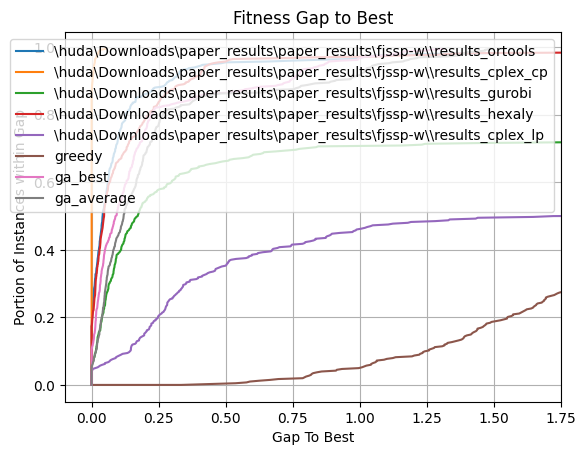

In [221]:
ecdf_inf(vectors, 'Fitness Gap to Best', labels=labels, x_lim=(-0.1, 1.75), xlabel='Gap To Best', ylabel='Portion of Instances within Gap')

In [222]:
data_as_dict['greedy']

{'BehnkeGeiger_10_workers': 381,
 'BehnkeGeiger_11_workers': 796,
 'BehnkeGeiger_12_workers': 886,
 'BehnkeGeiger_13_workers': 902,
 'BehnkeGeiger_14_workers': 936,
 'BehnkeGeiger_15_workers': 809,
 'BehnkeGeiger_16_workers': 1556,
 'BehnkeGeiger_17_workers': 1717,
 'BehnkeGeiger_18_workers': 1918,
 'BehnkeGeiger_19_workers': 1879,
 'BehnkeGeiger_1_workers': 192,
 'BehnkeGeiger_20_workers': 1645,
 'BehnkeGeiger_21_workers': 166,
 'BehnkeGeiger_22_workers': 181,
 'BehnkeGeiger_23_workers': 163,
 'BehnkeGeiger_24_workers': 178,
 'BehnkeGeiger_25_workers': 151,
 'BehnkeGeiger_26_workers': 249,
 'BehnkeGeiger_27_workers': 403,
 'BehnkeGeiger_28_workers': 295,
 'BehnkeGeiger_29_workers': 292,
 'BehnkeGeiger_2_workers': 259,
 'BehnkeGeiger_30_workers': 400,
 'BehnkeGeiger_31_workers': 633,
 'BehnkeGeiger_32_workers': 584,
 'BehnkeGeiger_33_workers': 669,
 'BehnkeGeiger_34_workers': 619,
 'BehnkeGeiger_35_workers': 729,
 'BehnkeGeiger_36_workers': 1558,
 'BehnkeGeiger_37_workers': 1345,
 'Beh

In [223]:
# time data
def get_average_timestamps(average_data, target, max_diff, force_all : bool = False):
    timestamps = dict()
    for instance in average_data:
        timestamps[instance] = []
        for entry in average_data[instance]['all']:
            for i in range(len(entry)):
                if entry[i][1] <= target[instance] * (1.0+max_diff):
                    timestamps[instance].append(entry[i][0])
                    break
        if len(timestamps[instance]) > 0 and (not force_all or (force_all and len(timestamps[instance])  == 18)):
            timestamps[instance] = sum(timestamps[instance])/len(timestamps[instance])
        else:
            timestamps.pop(instance)
    return timestamps


In [224]:
#time_path = '/home/dhu/Downloads/timelines.json'
time_path = r'C:\Users\huda\Downloads\ga_worker_results\timelines.json'

In [225]:
import json
with open(time_path, 'r') as f:
    ga_time_data = json.loads(f.read())

In [226]:
ga_best_times = dict()
for instance in ga_time_data:
    ga_best_times[instance] = ga_time_data[instance]['best']

In [227]:
time_data_as_dict['ga_best'] = ga_best_times

In [228]:
def get_timestamps(data, targets, max_diff, best : bool = False):
    timestamps = dict()
    labels = []
    for solver in data:
        labels.append(solver)
        if solver not in timestamps:
            timestamps[solver] = []
        for instance in data[solver]:
            for entry in data[solver][instance]:
                #for i in range(len(entry)):
                    if instance in targets[solver]:
                        if best:
                            if entry[1] <= (targets['best'][instance] * (1.0+max_diff)):
                                timestamps[solver].append(entry[0])
                                break
                        else:
                            if entry[1] <= (targets[solver][instance] * (1.0+max_diff)):
                                timestamps[solver].append(entry[0])
                                break
    for solver in timestamps:
        timestamps[solver].sort()
    return timestamps, labels

In [229]:
import matplotlib.pyplot as plt
def ecdf_inf(data, title, n_instances : int = 402, labels : list[str] = []):
    plot_vectors = []
    for vector in data:
        plot_vectors.append([[0.0],[0.0]])
        i = 1
        while i < len(vector):
            if vector[i] == float('inf'):
                break
            if vector[i] == -float('inf'):
                break
            while i < len(vector) and vector[i] == vector[i-1]:
                i += 1
            plot_vectors[-1][0].append(vector[i-1])
            plot_vectors[-1][1].append((i-1)/n_instances)
            i += 1
    for i in range(len(data)):
        plt.plot(plot_vectors[i][0], plot_vectors[i][1], label=[labels[i]])
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()


In [230]:
max_diff = 0.1

In [231]:
# TODO GA: secondary sorting by fastest time if multiple runs achieve the best fitness
def extract_best(data):
    result = dict()
    result['best'] = dict()
    for solver in data:
        result[solver] = dict()
        for instance in data[solver]:
            result[solver][instance] = data[solver][instance]
            if not instance in result['best']:
                result['best'][instance] = float('inf')
            if data[solver][instance] < result['best'][instance]:
                result['best'][instance] = data[solver][instance]
    return result

In [232]:
best_results_all = extract_best(data_as_dict)
timestamps = get_average_timestamps(ga_time_data, data_as_dict['ga_best'], max_diff, force_all=True)
all_timestamps, labels = get_timestamps(time_data_as_dict, best_results_all, max_diff)
all_timestamps['ga_average'] = sorted([timestamps[key] for key in timestamps])
labels.append('ga_average')

In [233]:
plot_data = []
labels = []
for key in all_timestamps:
    plot_data.append(all_timestamps[key])
    labels.append(key)

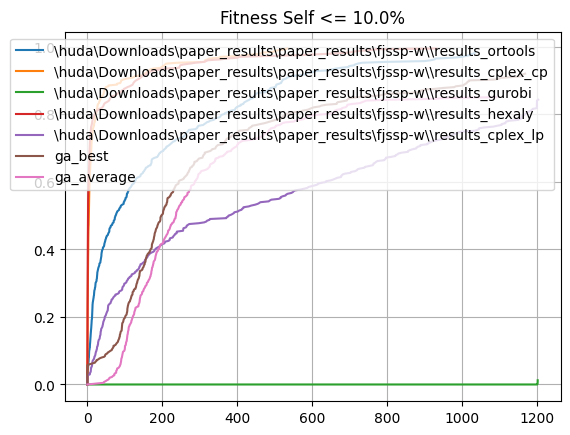

In [234]:
# TODO: insert last fitness as last entry at time <runtime> for every solver for every instance
ecdf_inf(plot_data, f'Fitness Self <= {max_diff*100}%', labels=list(labels))

In [235]:
timestamps = get_average_timestamps(ga_time_data, best_results, max_diff, True)
all_timestamps, labels = get_timestamps(time_data_as_dict, best_results_all, max_diff, True)
all_timestamps['ga_average'] = sorted([timestamps[key] for key in timestamps])
labels.append('ga_average')

In [236]:
plot_data = []
labels = []
for key in all_timestamps:
    plot_data.append(all_timestamps[key])
    labels.append(key)

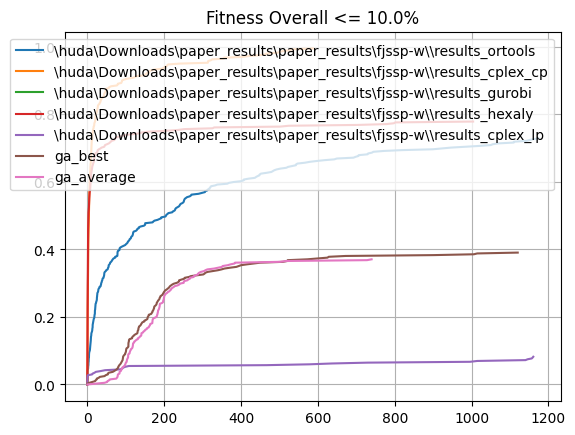

In [237]:
ecdf_inf(plot_data, f'Fitness Overall <= {max_diff*100}%', labels=list(labels))


In [281]:
def ecdf_inf(vectors, column, maxOrMin : bool = False, n_instances : int = 402, labels : list[str] = [], instances : list[str] = [], x_lim = (-0.1, 1.0), xlabel : str = None, ylabel : str = None, markers = None, marker_frequence = 10):
    
    plot_vectors = []
    for vector in vectors:
        plot_vectors.append([[0.0],[0.0]])
        i = 1
        while i < len(vector):
            if vector[i] == float('inf'):
                break
            if vector[i] == -float('inf'):
                break
            while i < len(vector) and vector[i] == vector[i-1]:
                i += 1
            plot_vectors[-1][0].append(vector[i-1])
            plot_vectors[-1][1].append((i-1)/n_instances)
            i += 1
    for i in range(len(vectors)):
        plt.plot(plot_vectors[i][0], plot_vectors[i][1], label=[labels[i]], marker=markers[i%len(markers)], markevery=list(range(0, len(plot_vectors[i][0]), max(1, int(len(plot_vectors[i][0])/marker_frequence)))), markersize=5)
    #if column == 'Fitness Gap to Best':
    plt.xlim(x_lim[0], x_lim[1])
    #plt.vlines(0.25, 0, 1)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True, 'both')
    plt.title(column)
    plt.show()

In [282]:
data_as_dict.keys()

dict_keys(['\\huda\\Downloads\\paper_results\\paper_results\\fjssp-w\\\\results_ortools', '\\huda\\Downloads\\paper_results\\paper_results\\fjssp-w\\\\results_cplex_cp', '\\huda\\Downloads\\paper_results\\paper_results\\fjssp-w\\\\results_gurobi', '\\huda\\Downloads\\paper_results\\paper_results\\fjssp-w\\\\results_hexaly', '\\huda\\Downloads\\paper_results\\paper_results\\fjssp-w\\\\results_cplex_lp', 'greedy', 'ga_best', 'ga_average'])

In [283]:
data_as_dict['greedy']

{'BehnkeGeiger_10_workers': 381,
 'BehnkeGeiger_11_workers': 796,
 'BehnkeGeiger_12_workers': 886,
 'BehnkeGeiger_13_workers': 902,
 'BehnkeGeiger_14_workers': 936,
 'BehnkeGeiger_15_workers': 809,
 'BehnkeGeiger_16_workers': 1556,
 'BehnkeGeiger_17_workers': 1717,
 'BehnkeGeiger_18_workers': 1918,
 'BehnkeGeiger_19_workers': 1879,
 'BehnkeGeiger_1_workers': 192,
 'BehnkeGeiger_20_workers': 1645,
 'BehnkeGeiger_21_workers': 166,
 'BehnkeGeiger_22_workers': 181,
 'BehnkeGeiger_23_workers': 163,
 'BehnkeGeiger_24_workers': 178,
 'BehnkeGeiger_25_workers': 151,
 'BehnkeGeiger_26_workers': 249,
 'BehnkeGeiger_27_workers': 403,
 'BehnkeGeiger_28_workers': 295,
 'BehnkeGeiger_29_workers': 292,
 'BehnkeGeiger_2_workers': 259,
 'BehnkeGeiger_30_workers': 400,
 'BehnkeGeiger_31_workers': 633,
 'BehnkeGeiger_32_workers': 584,
 'BehnkeGeiger_33_workers': 669,
 'BehnkeGeiger_34_workers': 619,
 'BehnkeGeiger_35_workers': 729,
 'BehnkeGeiger_36_workers': 1558,
 'BehnkeGeiger_37_workers': 1345,
 'Beh

In [284]:
plot = {'CP': data_as_dict['\\huda\\Downloads\\paper_results\\paper_results\\fjssp-w\\\\results_cplex_cp'], 'MILP': data_as_dict['\\huda\\Downloads\\paper_results\\paper_results\\fjssp-w\\\\results_cplex_lp'], 'GA': data_as_dict['ga_best'], 'GREEDY': data_as_dict['greedy']}

In [285]:
plot_data = dict()
best_results = dict()
for key in plot['GA'].keys():
    best = float('inf')
    best_results[key] = best
    plot_data[key] = dict()
    for solver in plot.keys():
        if key in plot[solver] and plot[solver][key] < best:
            best = plot[solver][key]
            best_results[key] = best
    for solver in plot.keys():
        if key in plot[solver]:
            plot_data[key][solver] = calculate_value(plot[solver][key], best)
        else:
            plot_data[key][solver] = float('inf')

In [286]:
plt.rcParams['axes.labelsize'] =  'x-large'

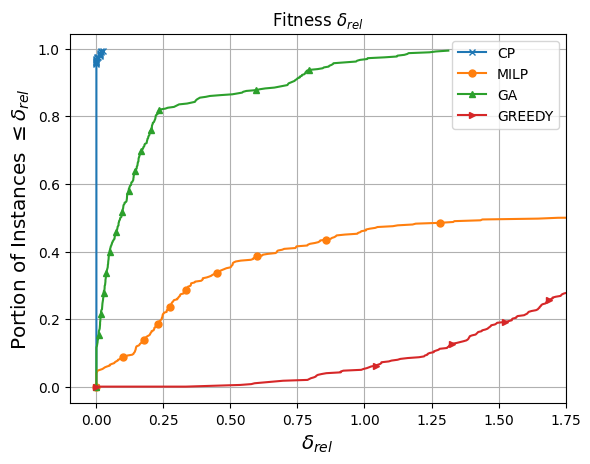

In [288]:
vectors = []
labels = []
for solver in plot.keys():
    labels.append(solver)
    vector = []
    for instance in plot['GA'].keys():
        vector.append(plot_data[instance][solver])
    vector.sort()
    vectors.append(vector)
markers=['x', 'o', '^', '>', 'v', '<', '*']
ecdf_inf(vectors, 'Fitness $\delta_{rel}$', labels=labels, x_lim=(-0.1, 1.75), xlabel='$\delta_{rel}$', ylabel='Portion of Instances $\leq \delta_{rel}$', markers=markers, marker_frequence=15)
